In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_jacobi
from scipy.misc import derivative
from scipy.integrate import quad
from numpy.linalg import solve
from math import exp, cos, log

In [28]:
def jacobi(n, k):
    return lambda t: (1 - t ** 2) * eval_jacobi(n, k, k, t)

In [29]:
def djacobi(n, k):
    return lambda t: derivative(jacobi(n, k), t)

In [30]:
def ddjacobi(n, k):
    return lambda t: derivative(djacobi(n, k), t)

In [31]:
def a_function(funs, phi, dphi, ddphi, i):
    k, p, q, f = funs
    return lambda x: k(x) * ddphi[i](x) + p(x) * dphi[i](x) + q(x) * phi[i](x)

In [32]:
def galerkin_method(segment, funs, N):
    a, b = segment
    k, p, q, f = funs
    phi = [jacobi(i, 1) for i in range(N)]
    dphi = [djacobi(i, 1) for i in range(N)]
    ddphi = [ddjacobi(i, 1) for i in range(N)]
    A = np.array([a_function(funs, phi, dphi, ddphi, i) for i in range(N)])
    C = np.array([quad(lambda t: f(t) * phi[i](t), a, b)[0] for i in range(N)])
    B = np.zeros([N, N])
    for i in range(N):
        for j in range(N):
            B[i, j] = quad(lambda t: phi[i](t) * A[j](t), a, b)[0]
    alpha = solve(B, C)
    return lambda t: sum([alpha[i] * phi[i](t) for i in range(N)])

In [36]:
funs = [[lambda x: -(4-x)/(5-2*x),
        lambda x: (1-x)/2,
        lambda x: 0.5*log(x+3),
        lambda x: 1+x/3],
        
       [lambda x: (x-2)/(x+2),
       lambda x: x,
       lambda x: 1-np.sin(x),
       lambda x: x**2],
        
       [lambda x: -(7-x)/(8+3*x),
       lambda x: (1+x/3),
       lambda x: (1-exp(x/2)/2),
       lambda x: 1/2-x/3]]

In [37]:
segment = [[-1,1],[-1,1],[-1,1]]

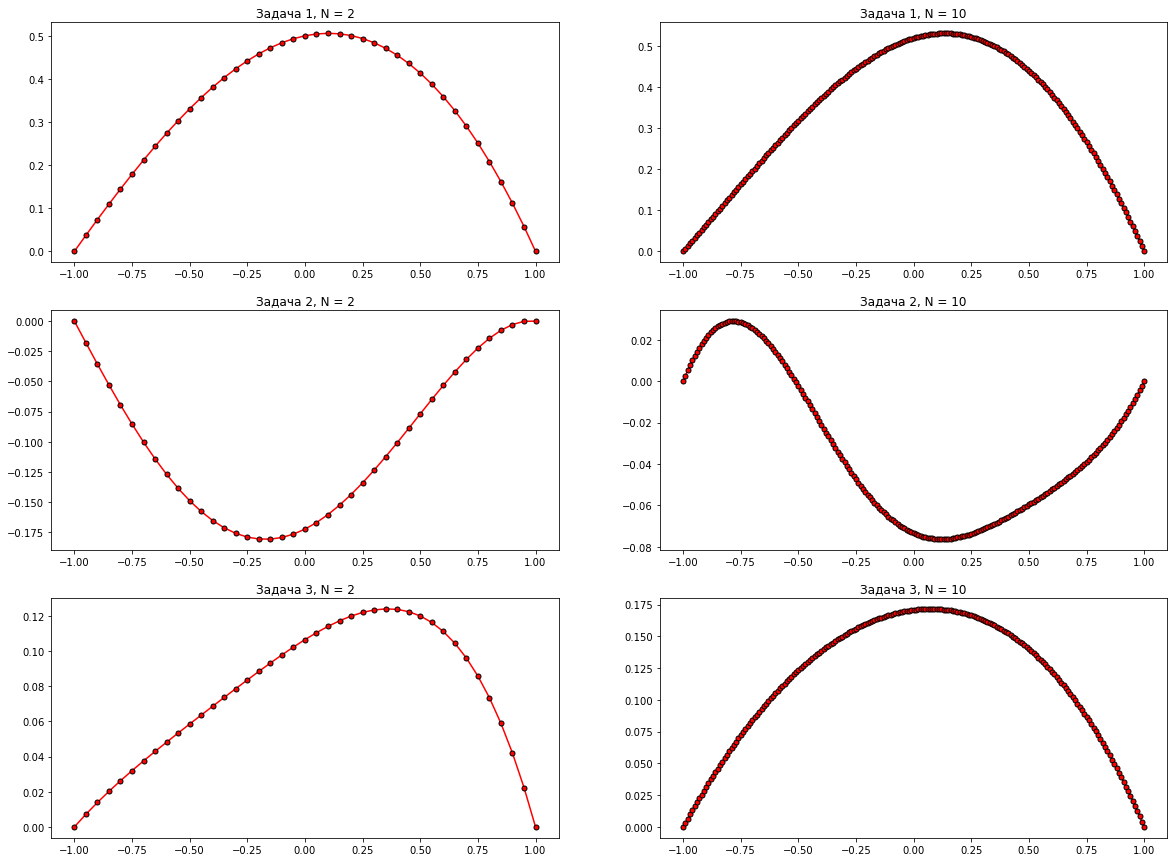

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        if j == 0:
            N, h = 3, 0.05
        else:
            N, h = 11, 0.01
        u = galerkin_method(segment[i],funs[i],N)
        a,b = segment[i]
        n = round((b - a) / h)
        x1 = np.zeros(n + 1)
        y = np.zeros(n + 1)
        for t in range(n + 1):
            x1[t] = a + t* h
            y[t] = u(x1[t])
        axes[i,j].plot(x1, y, marker='.', color='red', mec='black', ms=10)
        axes[i,j].set_title("Задача {}, N = {}".format(i+1,N-1))
plt.savefig("Lab8_graph")